In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import tweepy
from tweepy import OAuthHandler

In [ ]:
consumer_key = 'KtPake0WbuIZjPSZ1PzHtsRUt'
consumer_secret = 'TovEeb1S9EmYCx1etxRmAY9mLys5UzSSfskX5k89i2Clw7qZPF'
access_token = '172835284-JNMyTrc5qu7lGgc92ZSYn9WIWPRtInQ6tyI5Wmj1'
access_token_secret = 'kEX6BOfok2TFOJ7hAZkeu1Of7Llza9hDh4s2JlK6pyEP7'

In [ ]:
auth = tweepy.OAuthHandler( consumer_key , consumer_secret )
auth.set_access_token( access_token , access_token_secret )
api = tweepy.API(auth)

In [ ]:
df = pd.DataFrame(columns=["Date","User","IsVerified","Tweet","Likes","RT",'User_location'])
print(df)

Empty DataFrame
Columns: [Date, User, IsVerified, Tweet, Likes, RT, User_location]
Index: []


In [ ]:
def get_tweets(Topic,Count):    
    i=0
    for tweet in tweepy.Cursor(api.search, q=Topic,count=100, lang="en",exclude='retweets').items():
        print(i, end='\r')
        df.loc[i,"Date"] = tweet.created_at
        df.loc[i,"User"] = tweet.user.name
        df.loc[i,"IsVerified"] = tweet.user.verified
        df.loc[i,"Tweet"] = tweet.text
        df.loc[i,"Likes"] = tweet.favorite_count
        df.loc[i,"RT"] = tweet.retweet_count
        df.loc[i,"User_location"] = tweet.user.location
        #df.to_csv("TweetDataset.csv",index=False)
        df.to_excel('{}.xlsx'.format("TweetDataset"),index=False)   ## Save as Excel
        i=i+1
        if i>Count:
            break
        else:
            pass

In [ ]:
Topic=["Adani"]
get_tweets(Topic , Count=100)

In [ ]:
df.tail(10)

,Date,User,IsVerified,Tweet,Likes,RT,User_location,clean_tweet,Sentiment
91,2023-02-11 11:27:14,Family and Flats,False,Unwind in style and comfort at #AdaniVilasa in...,1,0,Baani City Center,surprise your date with some candlelight and a...,Neutral
92,2023-02-11 11:26:43,Raula88,False,@PiyushGoyal @narendramodi Change your last na...,0,0,,happiness is a sitting back and enjoying the m...,Positive
93,2023-02-11 11:26:16,MB Bahashwan,False,Indian regulators are aware of concerns regard...,2,2,India,cloud zoe like the new couple met n thry made ...,Negative
94,2023-02-11 11:26:13,"Android APP: 安卓应用程序 SGX Stock Pick,Fund Flow实际...",False,Adani Group loses half its market value in jus...,0,0,"LimTan #15, INCOME AT RAFFLES",the real voyage of discovery consists not in s...,Positive
95,2023-02-11 11:25:49,ahkam noor,False,India’s Finance Minister Answers Crypto Regula...,0,0,MedanCity,yes they are forgiving of thei,Neutral
96,2023-02-11 11:25:26,SanjayKJha,False,"Ordinary citizens want accountability, not an ...",1,2,Delhi,fijaipur acb detains suspended dsp in bribery ...,Neutral
97,2023-02-11 11:25:21,Rajesh Bhambhani,False,"@GirishKumarGoy6 @Ekthi_MeenuD Questions, not ...",0,0,,ramada resort and spa is the perfect place to ...,Positive
98,2023-02-11 11:25:20,Kishore,False,Time is coming very fast corrupt Adani's pet 🐶...,0,1,,it s disappointing how abhir s constant desire...,Negative
99,2023-02-11 11:25:18,1OF5 AM,False,@rishibagree @pbhushan1 Know of an UMPP of 500...,1,1,,i grew up in a hilly area in the aravalis sout...,Neutral
100,2023-02-11 11:25:14,𝘌𝘥𝘥𝘺 𝘷𝘢𝘯 𝘐𝘑𝘻𝘦𝘯𝘥𝘰𝘰𝘳𝘯 ™ 🐦,False,Breaking: India’s Finance Minister Answers Cry...,0,0,"Amsterdam, Netherlands",jagdish temple udaipur this master piece was b...,Neutral


In [ ]:
import re
def clean_tweet(tweet):
    return ' '.join(re.sub('(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|([RT])', ' ', str(tweet).lower()).split())

In [ ]:
from textblob import TextBlob
def analyze_sentiment(tweet):
    analysis = TextBlob(tweet)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'

In [ ]:
def prepCloud(Topic_text,Topic):
    Topic = str(Topic).lower()
    Topic=' '.join(re.sub('([^0-9A-Za-z \t])', ' ', Topic).split())
    Topic = re.split("\s+",str(Topic))
    stopwords = set(STOPWORDS)
    stopwords.update(Topic) ### Add our topic in Stopwords, so it doesnt appear in wordClous
    ###
    text_new = " ".join([txt for txt in Topic_text.split() if txt not in stopwords])
    return text_new

In [ ]:
df['clean_tweet'] = df['Tweet'].apply(lambda x : clean_tweet(x))
df.head(5)

,Date,User,IsVerified,Tweet,Likes,RT,User_location,clean_tweet,Sentiment
0,2023-02-11 11:40:47,Mukesh yogi,False,@news24tvchannel @narendramodi Be careful trip...,0,0,,be careful tripura people he is magician he de...,Negative
1,2023-02-11 11:40:44,Chhabinath,False,"@DrjpreddyReddy @pbhushan1 Amazon, Google,fb a...",0,0,"Uttar Pradesh, India",amazon google fb are running on their own reso...,Positive
2,2023-02-11 11:40:30,"Moonboy🤑⚡️(💙,🧡)🛸",False,India's Finance Minister Answers Crypto Regula...,0,0,billythecrypto.eth,india s finance minister answers crypto regula...,Neutral
3,2023-02-11 11:40:13,Sshom (शउम),False,Woes of Adani Group | Losses so far | Hindenbu...,0,0,भारत,woes of adani group losses so far hindenburg r...,Positive
4,2023-02-11 11:40:10,Sunny,False,@TimBuckleyCEF @gautam_adani @HindenburgRes @p...,0,0,Waddananggu,adani been waiting for a while to see this hea...,Neutral


In [ ]:
df["Sentiment"] = df["Tweet"].apply(lambda x : analyze_sentiment(x))
df.head(5)

,Date,User,IsVerified,Tweet,Likes,RT,User_location,clean_tweet,Sentiment
0,2023-02-11 11:40:47,Mukesh yogi,False,@news24tvchannel @narendramodi Be careful trip...,0,0,,be careful tripura people he is magician he de...,Negative
1,2023-02-11 11:40:44,Chhabinath,False,"@DrjpreddyReddy @pbhushan1 Amazon, Google,fb a...",0,0,"Uttar Pradesh, India",amazon google fb are running on their own reso...,Positive
2,2023-02-11 11:40:30,"Moonboy🤑⚡️(💙,🧡)🛸",False,India's Finance Minister Answers Crypto Regula...,0,0,billythecrypto.eth,india s finance minister answers crypto regula...,Neutral
3,2023-02-11 11:40:13,Sshom (शउम),False,Woes of Adani Group | Losses so far | Hindenbu...,0,0,भारत,woes of adani group losses so far hindenburg r...,Positive
4,2023-02-11 11:40:10,Sunny,False,@TimBuckleyCEF @gautam_adani @HindenburgRes @p...,0,0,Waddananggu,adani been waiting for a while to see this hea...,Neutral


In [ ]:
n = 15
print("Original tweet:\n",df['Tweet'][n])
print()
print("Clean tweet:\n",df['clean_tweet'][n])
print()
print("Sentiment of the tweet:\n",df['Sentiment'][n])

Original tweet:
 U TELL
U TELL?
PEHLEY aAAP
PEHLEY AAP? 

Adani-Hindenburg row: 'How to ensure protection of investors,' Supreme Cou… https://t.co/nlwtK13xby

Clean tweet:
 u tell u tell pehley aaap pehley aap adani hindenburg row how to ensure protection of investors supreme cou

Sentiment of the tweet:
 Neutral


In [ ]:
print("Total Tweets Extracted for Topic : {} are : {}".format(Topic,len(df.Tweet)))
print("Total Positive Tweets are : {}".format(len(df[df["Sentiment"]=="Positive"])))
print("Total Negative Tweets are : {}".format(len(df[df["Sentiment"]=="Negative"])))
print("Total Neutral Tweets are : {}".format(len(df[df["Sentiment"]=="Neutral"])))

Total Tweets Extracted for Topic : ['Adani'] are : 101
Total Positive Tweets are : 35
Total Negative Tweets are : 22
Total Neutral Tweets are : 44


In [ ]:
df["Sentiment"].value_counts()

Neutral     44
Positive    35
Negative    22
Name: Sentiment, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Summary of Counts for Total tweets')

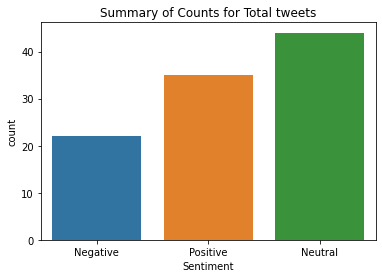

In [ ]:
sns.countplot(df["Sentiment"])
plt.title("Summary of Counts for Total tweets")

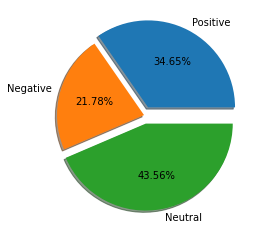

In [ ]:
a=len(df[df["Sentiment"]=="Positive"])
b=len(df[df["Sentiment"]=="Negative"])
c=len(df[df["Sentiment"]=="Neutral"])
d=np.array([a,b,c])
explode = (0.1, 0.0, 0.1)
plt.pie(d,shadow=True,explode=explode,labels=["Positive","Negative","Neutral"],autopct='%1.2f%%');

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Summary of Counts for Total tweets,Distributed by if the User has a verified Account or not')

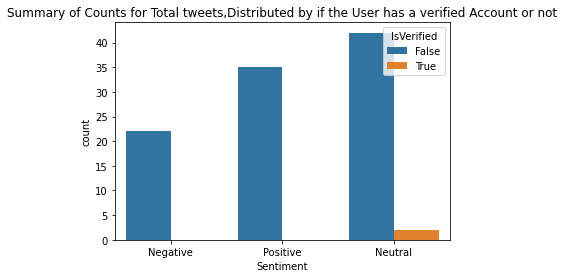

In [ ]:
sns.countplot(df["Sentiment"],hue=df.IsVerified)
plt.title("Summary of Counts for Total tweets,Distributed by if the User has a verified Account or not")